# Teoría de la Información y la Codificación
## Tarea: Códigos EAN-13


# Autor: 

Rellene la siguiente información:

 - Estudiante (nombre y apellidos): Cristina Sánchez Justicia  
 - DNI/NIE/Pasaporte: 77689772G  
 - Grupo: A 
 - Curso académico: 4º  



__Yo, como estudiante de la asignatura, aseguro que la elaboración de estos ejercicios ha sido realizada de forma individual, sin incurrir en copias parciales o totales de código fuente o documentación, y acepto las repercusiones que conllevaría si esto no fuese así.__


# Respuestas a las cuestiones teóricas:


<b>Fuente:</b> Sin memoria porque los símbolos emitidos son estadísticamente independientes <br>
<b>Canal:</b> Es sin ruido porque puede haber manchas o errores en la imágen (que no se haya imprimido bien, que el archivo se haya corrompido un poco). Por eso tiene tantos sistemas de seguridad. <br>Es determinista porque cada símbolo de salida se asocia con varios símbolos de entrada. <br> Es sin pérdida porque al conocer la salida, se conoce unívocamente la entrada <br>
<b>Destino:</b> <br>

<b>conjunto de mensajes de la fuente:</b> Los números<br> 
<b>alfabeto de codificación:</b> Unidad de raya blanca y unidad de raya negra<br>
<b>función de codificación:</b> <br>


In [73]:

#imports

import numpy as np
import matplotlib.pyplot as plt


In [74]:

# Secuencia de dígitos a codificar
digitos= "003994155486"

In [75]:

zonaSilenciosa= 9 # Tamaño de la zona silenciosa en Unidades
totalUnidades= 95+2*zonaSilenciosa # Se deben reservar totalUnidades unidades para imprimir el código de barras
grosor= 2 # Ancho (en píxeles) de cada unidad
tamDigito = 7
S = 3 
M = 5 

In [76]:
# Salida: código de barras (unidades) y dígito de control
# @pre: secuenciaDigitos debe de ser una lista de 12 enteros 
negro = 0
blanco = 1 
def CalcularCodigoBarras(secuenciaDigitos):

    # Código de barras
    # Array de totalUnidades. 0= negro; 1= blanco
    codigo= np.ones( totalUnidades , dtype= np.uint8)


    # Descomentar y rellenar
    
    Bcodificacion= np.uint8(
        [
            [1, 1, 1, 0, 0, 1, 0], # 0    
            [1, 1, 0, 0, 1, 1, 0], # 1
            [1, 1, 0, 1, 1, 0, 0], # 2
            [1, 0, 0, 0, 0, 1, 0], # 3
            [1, 0, 1, 1, 1, 0, 0], # 4
            [1, 0, 0, 1, 1, 1, 0], # 5
            [1, 0, 1, 0, 0, 0, 0], # 6
            [1, 0, 0, 0, 1, 0, 0], # 7
            [1, 0, 0, 1, 0, 0, 0], # 8
            [1, 1, 1, 0, 1, 0, 0] # 9
        ]
    )
    
    Rcodificacion = np.ones((10,7), dtype=np.uint8) - Bcodificacion
    Gcodificacion = np.uint8(
        [
            [1, 0, 1, 1, 0, 0, 0], 
            [1, 0, 0, 1, 1, 0, 0],
            [1, 1, 0, 0, 1, 0, 0],
            [1, 0, 1, 1, 1, 1, 0],
            [1, 1, 0, 0, 0, 1, 0],
            [1, 0, 0, 0, 1, 1, 0],
            [1, 1, 1, 1, 0, 1, 0],
            [1, 1, 0, 1, 1, 1, 0],
            [1, 1, 1, 0, 1, 1, 0],
            [1, 1, 0, 1, 0, 0, 0]
   ]
   )

    B=0
    G=1
    codificaciones= np.uint8( # 0= B; 1= G
        [
            [B, B, B, B, B, B], # Dígito de control 0
            [B, B, G, B, G, G], # Dígito de control 1
            [B, B, G, G, B, G], # dígito de control 2
            [B, B, G, G, G, B], # dígito de control 3
            [B, G, B, B, G, G], # dígito de control 4
            [B, G, G, B, B, G], # dígito de control 5
            [B, G, G, G, B, B], # dígito de control 6
            [B, G, B, G, B, G], # dígito de control 7
            [B, G, B, G, G, B], # dígito de control 8
            [B, G, G, B, G, B] # dígito de control 9
        ]
    )
   
    # Paso 1. Calcular dígito de control
    # Se suman los dígitos en las posiciones impares, es decir, de indice par
    impares = int(secuenciaDigitos[0])+int(secuenciaDigitos[2])+int(secuenciaDigitos[4])
    impares += int(secuenciaDigitos[6])+int(secuenciaDigitos[8])+int(secuenciaDigitos[9])
    impares += int(secuenciaDigitos[11])
    # El resultado se multiplica por 3 
    multiplo = impares*333
    # Se suman los dígitos de las posiciones pares 
    pares = impares + int(secuenciaDigitos[1]) + int(secuenciaDigitos[3]) 
    pares += int(secuenciaDigitos[5]) + int(secuenciaDigitos[7]) + int(secuenciaDigitos[9])
    pares += int(secuenciaDigitos[11]) 
    # Se calcula el resultado módulo 10
    M = pares % 10 
    # Si M = 0, entonces X = 0, en otro caso, entonces X = 10-M 
    X = 0 
    if M != 0: 
      X = 10 - M
    
    # Paso 2. Escribir las unidades de las guías (S, E, M)
    codigo[zonaSilenciosa] = negro
    #codigo[zonaSilenciosa + 1] = blanco 
    codigo[zonaSilenciosa + 2] = negro

    codigo[-zonaSilenciosa] = negro
    #codigo[-zonaSilenciosa+1] = blanco
    codigo[-zonaSilenciosa+2] = negro

    #codigo[zonaSilenciosa+2+6*7+0] = blanco 
    codigo[totalUnidades//2-1] = negro 
    #codigo[zonaSilenciosa+2+6*7+2] = blanco 
    codigo[totalUnidades//2+1] = negro 
    #codigo[zonaSilenciosa+2+6*7+4] = blanco 

    # Paso 3. Rellenar las unidades de LLLLLL
    L = secuenciaDigitos[0:6]
    codificacion = codificaciones[X] 
    for i in range(len(L)): 
        l = int(L[i])
        if codificacion[i] == B: 
            c = Bcodificacion[l]
        else: 
            c = Gcodificacion[l]
        # Ahora tenemos que insertar c en su lugar correspondiente 
        inicio = zonaSilenciosa + S 
        codigo[inicio+i*tamDigito: inicio+tamDigito*(i+1)] = c
    
    # Paso 4. Rellenar las unidades de RRRRRR
    R = secuenciaDigitos[6:12]
    for i in range(len(R)): 
        r = int(R[i])
        c = Rcodificacion[r]
        inicio = zonaSilenciosa + S + M + tamDigito*6 
        codigo[inicio+i*tamDigito: inicio+tamDigito*(i+1)] = c 
    # Devolvería el código y el dígito de control
    return codigo, X  

resultado, DigitoControl= CalcularCodigoBarras(digitos)

In [77]:

# Imagen de salida
anchoIm= totalUnidades*grosor
altoIm= 100
colorBlanco = 255 
colorNegro = 0
imagenSalida= np.ones( (altoIm, anchoIm) , dtype=np.uint8)*colorBlanco 

# Se convierte el string a una lista de enteros 
digitos = [int(x) for x in digitos]


# Pintar código de barras
# Para pintar un rectángulo de la coordenada (x,y) (10, 9) a la (13,11): 
for i in range(len(resultado)): 
    if resultado[i] == negro: 
        imagenSalida[10:80, i*2:i*2+2]= colorNegro 



Text(120, 90, '[1, 5, 5, 4, 8, 6]')

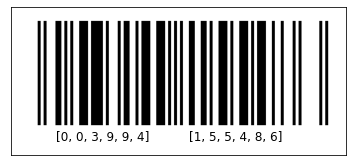

In [78]:

imgplot= plt.imshow(imagenSalida, cmap='gray')
imgplot.axes.get_xaxis().set_visible(False)
imgplot.axes.get_yaxis().set_visible(False)

# Para pintar texto en alguna coordenada, con un tamaño de fuente especificado
plt.text(30, altoIm-10, digitos[0:6], fontsize=12)
plt.text(120, altoIm-10, digitos[6:12], fontsize=12)
# PROGRAMAR AQUÍ 